In [ ]:
#Código criado na plataforma kaggle utilizando o dataset Mall Customer Segmentation Data 
#Primeiro Exercício do Módulo 1 (Fundamentos de Machine Learning)

In [1]:
#bibliotecas utilizadas
import numpy as np # linear algebra // Biblioteca utilizada para trabalhar com vetores
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), trabalhar com dataframes
import seaborn as sns 
import google
import matplotlib.pyplot as plt #biblbioteca utilizada para criar gráficos comuns estilo Matlab

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
#abrindo o arquivo csv Mall_Customers.csv
#dataframe no pandas
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
#analisando o head do dataset e as 5 primeiras linhas do banco de dados
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#verificando a existencia de campos nulos
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#soma a quantidade de valores nulos existentes em cada coluna
customers.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#adicionando valores nulos
customers_null = customers
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index,col] = np.nan

In [8]:
customers_null.info() #verificando as informações do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [9]:
customers_null.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,NaN,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,NaN,Female,23.0,NaN,77.0
4,5.0,Female,31.0,17.0,40.0


In [10]:
customers_null.isnull().sum() #10% dos dados foram transformados em nan

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [11]:
#deletando as linhas que possuem valor nulo
#função utilizada dependendo da analise que se deseja realizar
customers_null.dropna()

In [12]:
#Preenchendo os valores nulos com o valor 0
#função utilizada dependendo da analise que se deseja realizar
customers_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,0.0,Female,23.0,0.0,77.0
4,5.0,Female,31.0,17.0,40.0
...,...,...,...,...,...
195,196.0,Female,35.0,120.0,79.0
196,0.0,Female,45.0,126.0,0.0
197,198.0,Male,32.0,126.0,74.0
198,199.0,Male,32.0,137.0,0.0


In [13]:
#encontra as estatisticas do dataset
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,101.277778,38.316667,61.555556,49.722222
std,57.724646,13.728604,26.722497,25.538897
min,1.000000,18.000000,15.000000,1.000000
25%,51.750000,28.000000,42.750000,35.000000
50%,101.500000,35.500000,62.000000,49.500000
75%,152.250000,48.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,98.000000


In [14]:
#podemos utilizar essa descrição para preencher os valores nulos de uma coluna por seus valores médios
#função utilizada dependendo da analise que se deseja realizar
customers_null.fillna(customers_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000,NaN,19.0,15.000000,39.000000
1,2.000000,Male,21.0,15.000000,81.000000
2,3.000000,Female,20.0,16.000000,6.000000
3,101.277778,Female,23.0,61.555556,77.000000
4,5.000000,Female,31.0,17.000000,40.000000
...,...,...,...,...,...
195,196.000000,Female,35.0,120.000000,79.000000
196,101.277778,Female,45.0,126.000000,49.722222
197,198.000000,Male,32.0,126.000000,74.000000
198,199.000000,Male,32.0,137.000000,49.722222


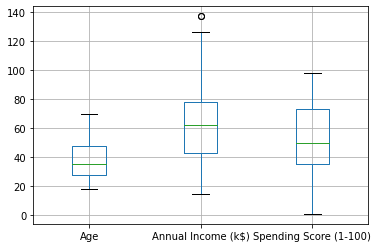

In [15]:
#verificando se existem anomalias (outliers) 
#utilizando o boxplot
boxplot = customers.boxplot(column=['Age','Annual Income (k$)','Spending Score (1-100)'])

In [ ]:
#verificando outliers com Z-Score

In [16]:
from scipy import stats
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result = np.where(z>threshold)
df_salario_outlier = customers.iloc[result[0]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [17]:
df_salario_outlier #pelo z-score com threshold=2 não existem possiveis outliers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [ ]:
#Explorando os dados. Entendendo alguns comportamentos dos clientes

Text(0.5, 1.0, 'Distribuição dos clientes quanto ao genero')

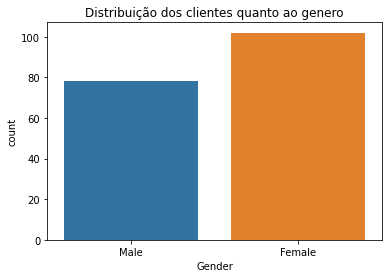

In [18]:
#analisando a distribuição dos clientes por genero
sns.countplot(x = 'Gender',data = customers)
plt.title('Distribuição dos clientes quanto ao genero')

In [ ]:
#distribuição dos clientes por idade

Text(0.5, 0, 'Idade')

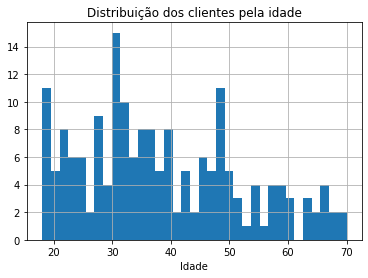

In [19]:
#histograma
customers.hist('Age',bins = 35) #bins seleciona a quantidade de  grupos que se deseja dividir os dados
plt.title('Distribuição dos clientes pela idade')
plt.xlabel('Idade')

In [20]:
#Aplicando a codificação aos dados
#copiando colunas do tipo categórica
cat_df_customers = customers.select_dtypes(include=['object']) 

In [21]:
cat_df_customers.head()

,Gender
0,NaN
1,Male
2,Female
3,Female
4,Female


In [22]:
#aplicando mapeamento
replace_map = {'Gender':{'Male':1,'Female':2}}
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist()#encontra a lista das variáveis categóricas
replace_map_comp = {'Gender':{k:v for k, v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [23]:
cat_df_customers_replace = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [24]:
cat_df_customers_replace.replace(replace_map_comp,inplace = True)
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
#Aplicando o label Encodering

In [25]:
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [27]:
cat_df_customers_lc = customers

In [28]:
cat_df_customers_lc['Gender']=pd.Categorical(cat_df_customers_lc['Gender'])
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [29]:
cat_df_customers_lc['Gender']=cat_df_customers_lc['Gender'].cat.codes
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
customers_label = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [32]:
customers_label['Gender'] = le.fit_transform(customers_label['Gender'])
customers_label.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [34]:
#Utilizando o Hot Encoding
#Get dummies
customers_one_hot = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_one_hot=pd.get_dummies(customers_one_hot)
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [36]:
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [37]:
#importando o OneHotEncoder
customers_one_hot=customers
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray()
customers_ohe.shape
customers_ohe

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.